<h1> Intro to 3d plotting with color </h1>
This notebook will go over plotting 3d, gridded data

In [2]:
## Import the necessary packages for data I/O and plotting
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
%matplotlib notebook

We will use Sea Surface Temperature (SST) across the globe as an example for this. First we read it in:

Now that we have read in the data, let's start to visualize it.
Where are the latitude and longitude points? Do they make sense? We can make a figure and scatter these to see.

Looks like they're somewhat regularly spaced. So now we can start to think about how Sea Surface Temperature (SST) varies. What if we plot it versus longitude.... is that informative?

That's... not really informative. But what's a better way to plot this? We could try scattering the data, and having each data point be a different color. First, we'll explore the data.

30
30
30


<IPython.core.display.Javascript object>


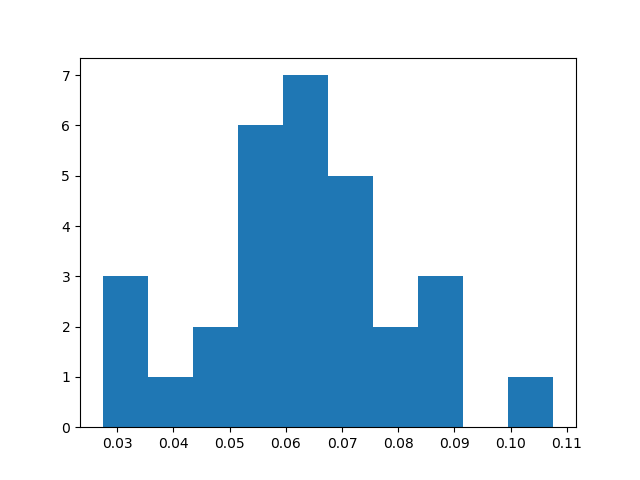

(array([3., 1., 2., 6., 7., 5., 2., 3., 0., 1.]),
 array([0.02740662, 0.03542865, 0.04345069, 0.05147272, 0.05949475,
        0.06751678, 0.07553882, 0.08356085, 0.09158288, 0.09960491,
        0.10762695]),
 <a list of 10 Patch objects>)

In [79]:
## What's a better way to plot this?
## We could use a scatter plot, where we color the points by their sst value
## First print out the data to see what it looks like.
print(len(lon))
print(len(lat))
print(len(sst))
## this makes a histogram of the values of SST
plt.hist(kappa)
## Notice a few things: The latitude remains the same as the longitude increases to it's final range.
## Then the latitude increases by one, and is repeated as the longitude goes back to 0 then increases again.

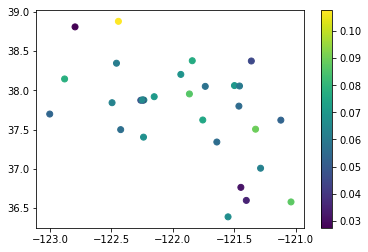

In [22]:
## Here we can make a figure that colors them by their sst value, and I think it normalizes them by the maximum value. 
plt.figure()
plt.scatter(lon,lat,c=sst)
## The default colormap is viridis looks like...
plt.colorbar()
plt.show()

Another way to plot the data as opposed to scattering is to make a meshed grid. This interpolates between datapoints and makes a continuous 2d plot that is colored. But in order to make this, we need the X, Y, and Z values we are plotting (Longitude, latitude, and SST respectively) as "meshes" - 2D arrays:

In [6]:
## Another way to do this is to make a meshed grid and plot it with different python functions (contour,pcolor,etc.)
## To do this we'll need to loop through the unique longitudes and latitudes to make a "grid" of SST (draw on board)

## the end goal of what we want are three 2d arrays. That way, we can hand off all three arrays to python gridding fn's.
## We will need three things:
## 1. A grid of X points:
## [x1,x2,x3,x4,x5]
## [x1,x2,x3,x4,x5]
## ...
## 2. A grid of the Y points:
## [y1,y1,y1,y1,y1]
## [y2,y2,y2,y2,y2]
## ...
## 3. A grid of the Z points that correspond to the X and Y grids:
## [Z_x1y1, Z_x2y1, Z_x3y1, Z_x4y1, Z_x5y1]
## [Z_x1y2, Z_x2y2, Z_x3y2, Z_x4y2, Z_x5y2]
## ...
## That way each point combination (index) between thtese three arrays can be used together to match for a grid.
data = pd.read_csv('/home/eking/Documents/internship/data/Kappa/SNR_3/75_bins/15/full_file.csv')

lon = data['Slon'].values
lat = data['Slat'].values
kappa = data[' tstar(s) '].values

minlat = 36
maxlat = 39

minlon = -124
maxlon = -120.5

numberofpoints = 100

from scipy import interpolate
f = interpolate.interp2d(lon,lat,kappa,kind='linear')

gridlon = np.linspace(minlon,maxlon,numberofpoints)
gridlat = np.linspace(minlat,maxlat,numberofpoints)

GRIDLON,GRIDLAT = np.meshgrid(gridlon,gridlat)

lonshp = np.shape(GRIDLON)
latshp = np.shape(GRIDLAT)
print(np.shape(GRIDLON))
print(np.shape(GRIDLAT))
GRIDLON_1d = np.reshape(GRIDLON, (lonshp[0]*lonshp[1]))
GRIDLAT_1d = np.reshape(GRIDLAT, (latshp[0]*latshp[1]))
print(np.shape(GRIDLON_1d))
print(np.shape(GRIDLAT_1d))

print(GRIDLAT_1d)
print(kappa)

kappa_grid = f(gridlon,gridlat)

#GRIDLON = np.reshape(GRIDLON, (numberofpoints,numberofpoints))
#GRIDLAT = np.reshape(GRIDLAT, (numberofpoints,numberofpoints))
print(kappa_grid)
print(np.shape(kappa_grid))

## Reshape kappa grid to 2d


(100, 100)
(100, 100)
(10000,)
(10000,)
[36. 36. 36. ... 39. 39. 39.]
[0.08639284 0.07040905 0.03760159 0.07084096 0.04811706 0.06111576
 0.05371947 0.06662679 0.06735213 0.07809605 0.05583667 0.06342505
 0.10762695 0.08972167 0.05623789 0.06221902 0.0690037  0.03166106
 0.03502941 0.06544617 0.07516591 0.08747629 0.02740662 0.07637147
 0.04509339 0.07027328 0.06025037 0.05309389 0.05538456 0.05777579]
[[ 0.          0.          0.         ...  0.08088757  0.08088757
   0.08088757]
 [ 0.          0.          0.         ...  0.08088757  0.08088757
   0.08088757]
 [ 0.          0.          0.         ...  0.08088757  0.08088757
   0.08088757]
 ...
 [-0.09381798 -0.09381798 -0.09381798 ...  2.96366981  2.96366981
   2.96366981]
 [-0.09381798 -0.09381798 -0.09381798 ...  2.96366981  2.96366981
   2.96366981]
 [-0.09381798 -0.09381798 -0.09381798 ...  2.96366981  2.96366981
   2.96366981]]
(100, 100)


In [18]:
f(-122,36.5)
print(np.min(kappa_grid))


-13.560926989619231


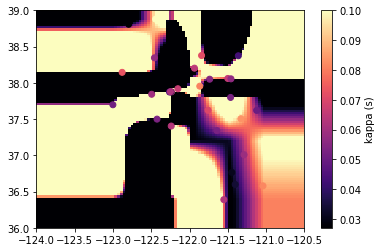

In [10]:
## Now we can plot it. Let's use the contour function to put contour lines on the grid.
## It takes these three 2-D arrays. Then also you put in the 
## number of countour intervals, width of the line, and colormap.
plt.figure()
plt.pcolormesh(GRIDLON,GRIDLAT,kappa_grid,cmap='magma',vmin=0.027,vmax=0.1)
#plt.contour(GRIDLON,GRIDLAT,kappa_grid,40,linewidths=0.8,cmap='magma')



## Add a colorbar. Don't need any input if you don't want to, so it's empty parentheses.
cb=plt.colorbar()
## Set a label on the colorbar
cb.set_label('kappa (s)')

plt.scatter(lon,lat,c=kappa,cmap='magma')
plt.show()

<IPython.core.display.Javascript object>


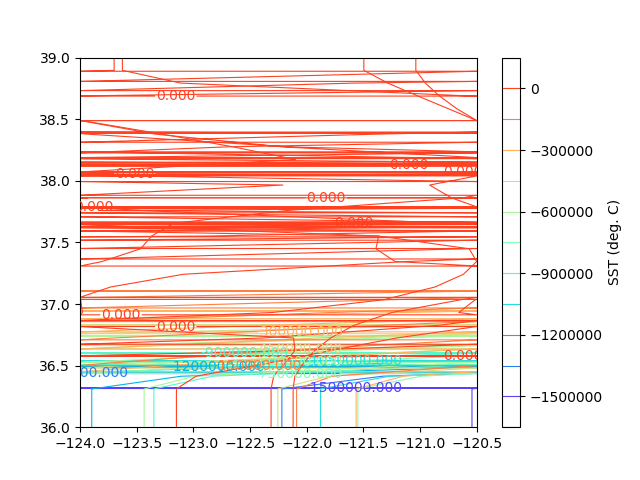

In [69]:
## Can make it again, but change hte number of intervals to be fewer, change the colormap...
plt.figure()
contour=plt.contour(GRIDLON,GRIDLAT,kappa_grid,10,linewidths=0.8,cmap='rainbow')
## This sets labels on the conturs as well. 
plt.clabel(contour, inline=1, fontsize=10)
cb=plt.colorbar()
cb.set_label('SST (deg. C)')
plt.show()

## Also tell them about colormaps and grayscale/colorblindness

<IPython.core.display.Javascript object>


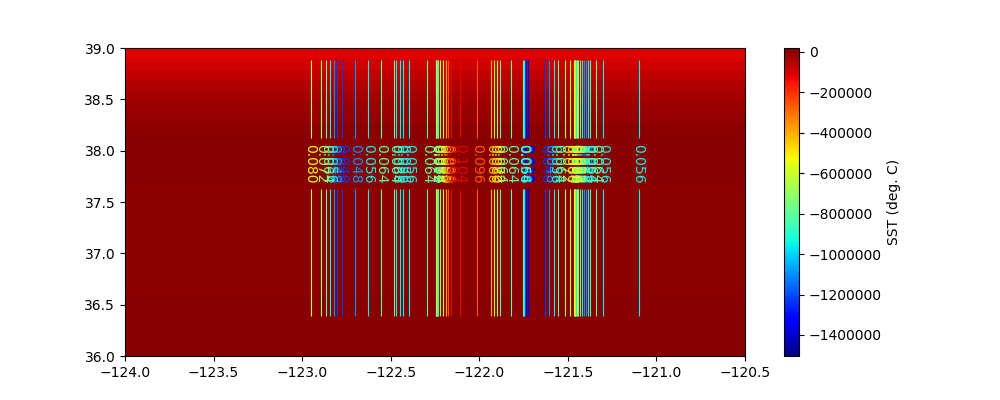

In [70]:
## Now let's use pcolormesh. Instead of contours, it will plot the actual colors.
## Initiate the figure.... let's make it wider than it is tall
plt.figure(figsize=(10,4))
## Use pcolormesh 
plt.pcolormesh(GRIDLON,GRIDLAT,kappa_grid,cmap='jet')
cb=plt.colorbar()
cb.set_label('SST (deg. C)')
contour=plt.contour(X,Y,Z,10,linewidths=0.8,cmap='jet')
plt.clabel(contour, inline=1, fontsize=10)
plt.show()

<IPython.core.display.Javascript object>


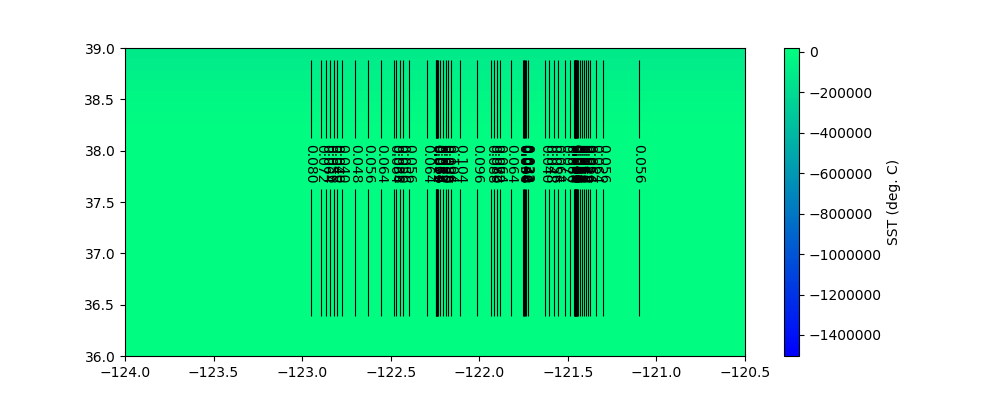

In [72]:
## Let's do the same as above, but.... also add contours on top of it.
plt.figure(figsize=(10,4))
plt.pcolormesh(GRIDLON,GRIDLAT,kappa_grid,cmap='winter')
cb=plt.colorbar()
cb.set_label('SST (deg. C)')
## Add the contours
contour=plt.contour(X,Y,Z,10,linewidths=0.8,colors='k')
## And label the contours
plt.clabel(contour, inline=1, fontsize=10)
plt.show()

In [29]:
np.reshape?
